<img src="Tp2.png">

<h1 align="center">FEKIH Firas</h1>
<h1 align="center">3 DNI 2</h1>
<h2 align="center">Cluster Analysis with Python</h2>

![We Can Use Giphy & Emojis Too](https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fjuliastats.org%2FClustering.jl%2Fstable%2Fassets%2Flogo.png&f=1&nofb=1)


## Objectif :
> Le but du tp est d'etudier le principe de clustering on appliquant algorithme de clustering : Kmeans. 
> Ainsi on etudie l'effet de bruit qu'on applique cet algorithme.

<h2><font color='red'>I - L'algorithme de K-means : Clustering</font></h2>

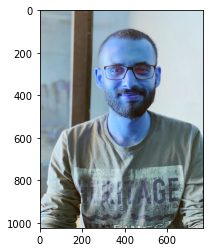

In [61]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
import skimage.io

image = cv2.imread('me.jpg')
(h1, w1) = image.shape[:2]

image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

image = image.reshape((image.shape[0] * image.shape[1], 3))

clt = KMeans(n_clusters = 2)

labels = clt.fit_predict(image)
quant = clt.cluster_centers_.astype("uint8")[labels]

#reshape the feature vectors to images
quant = quant.reshape((h1, w1, 3))
image = image.reshape((h1, w1, 3))

# convert from L*a*b* to RGB
quant = cv2.cvtColor(quant, cv2.COLOR_LAB2BGR)
image = cv2.cvtColor(image, cv2.COLOR_LAB2BGR)

cv2.imwrite('me2.jpg', quant)
plt.imshow(image)

cv2.imread('me.jpg')
cv2.waitKey(0)
cv2.destroyAllWindows()

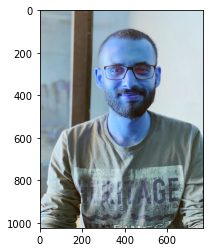

In [62]:
plt.imshow(image)

###### <font color=green>Conclusion</font> :
```
> Un nombre K grand, peut conduire à un partitionnement trop fragmenté des données. Ce qui empêchera de découvrir des patterns intéressants dans les données. 
> Par contre, un nombre de clusters trop petit, conduira à avoir, potentiellement, des cluster trop généralistes contenant beaucoup de données. Dans ce cas, on n’aura pas de patterns “fins” à découvrir.
```


<h2><font color='red'>II - Bruits sur l'image</font></h2>

In [63]:
!pip install opencv-python

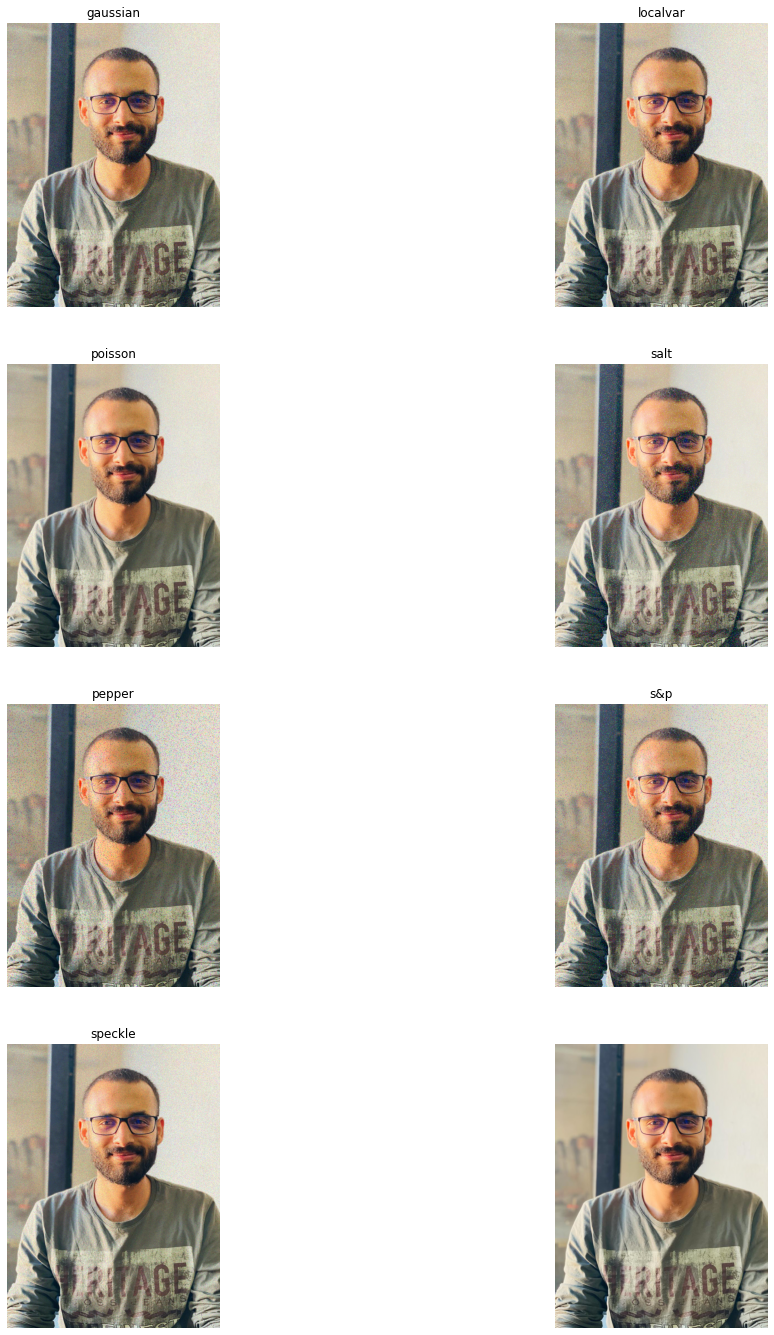

In [64]:
import skimage.io
import matplotlib.pyplot as plt
img_path="me.jpg"
img = skimage.io.imread(img_path)/255.0

def plotnoise(img, mode, r, c, i):
    plt.subplot(r,c,i)
    if mode is not None:
        gimg = skimage.util.random_noise(img, mode=mode)
        plt.imshow(gimg)
    else:
        plt.imshow(img)
    plt.title(mode)
    plt.axis("off")

plt.figure(figsize=(18,24))
r=4
c=2
plotnoise(img, "gaussian", r,c,1)
plotnoise(img, "localvar", r,c,2)
plotnoise(img, "poisson", r,c,3)
plotnoise(img, "salt", r,c,4)
plotnoise(img, "pepper", r,c,5)
plotnoise(img, "s&p", r,c,6)
plotnoise(img, "speckle", r,c,7)
plotnoise(img, None, r,c,8)
plt.show()


###### <font color=green>Conclusion</font> :
Dans cette partie nous bruitons l'image avec un bruit gaussien. Une classification par kmeans est alors effectuée à partir de l'image bruitée. Nous pouvons remarquer deux choses: 
> - En présence d'un bruit important les couleurs obtenues pour chacune des classes ne correspondent pas tout à fait aux couleurs originales Nous observons des zones fragmentées. 
> - Des petits groupes de pixels appartenant à une classe se retrouvent isolés au milieu de pixels apprenant à une autre classe. 
Cela s'explique par le fait que lors de la classification par kmeans

<h2><font color='red'>III- Elimination des bruits :</font></h2> 


- On va choisit le type de bruit "salt" dans le reste de TP.



True

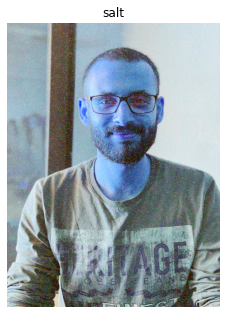

In [65]:
import numpy as np
import cv2
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
import skimage.io
import matplotlib.pyplot as plt
import skimage.io

def plotnoise(img, mode, r, c, i):
    plt.subplot(r,c,i)
    if mode is not None:
        gimg = skimage.util.random_noise(img, mode=mode)
        plt.imshow(gimg)
        plt.imsave('slty.png',gimg)
    else:
        plt.imshow(img)
    plt.title(mode)
    plt.axis("off")


image = cv2.imread('me.jpg')

(h1, w1) = image.shape[:2]

image = image.reshape((image.shape[0] * image.shape[1], 3))

clt = KMeans(n_clusters = 3)

labels = clt.fit_predict(image)
quant = clt.cluster_centers_.astype("uint8")[labels]

#reshape the feature vectors to images
quant = quant.reshape((h1, w1, 3))
image = image.reshape((h1, w1, 3))

plt.figure(figsize=(18,24))
r=4
c=2
plotnoise(image, "salt", r,c,4)

cv2.imwrite('slty2.jpg', quant)

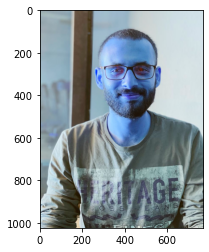

In [66]:
import numpy as np
import cv2
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
import skimage.io
import matplotlib.pyplot as plt

image = cv2.imread('me.jpg')
(h1, w1) = image.shape[:2]

image = image.reshape((image.shape[0] * image.shape[1], 3))

clt = KMeans(n_clusters =3)

labels = clt.fit_predict(image)
quant = clt.cluster_centers_.astype("uint8")[labels]

#reshape the feature vectors to images
quant = quant.reshape((h1, w1, 3))
image = image.reshape((h1, w1, 3))


cv2.imwrite('mee.jpg', quant)
plt.imshow(image)

- Après un test entre deux images, l'une est bruité et l'autre est l'image original, on démontre qu'après plusieur essais que l'image bruité est moins proche de l'image original que l'image n'est pas bruité. 
- Mais cette différance n'est pas visible avec deux clusters, par contre il est visible a partir 3 clusters est plus, est chaque fois le nombre augmantes, la différance augmante aussi.



###### On a choisit l'algorithme de filtrage : "Median filtre" 


In [67]:

import numpy
from PIL import Image
import matplotlib.pyplot as plt
import cv2

def median_filter(data, filter_size):
    temp = []
    indexer = filter_size // 2
    data_final = []
    data_final = numpy.zeros((len(data),len(data[0])))
    for i in range(len(data)):

        for j in range(len(data[0])):

            for z in range(filter_size):
                if i + z - indexer < 0 or i + z - indexer > len(data) - 1:
                    for c in range(filter_size):
                        temp.append(0)
                else:
                    if j + z - indexer < 0 or j + indexer > len(data[0]) - 1:
                        temp.append(0)
                    else:
                        for k in range(filter_size):
                            temp.append(data[i + z - indexer][j + k - indexer])

            temp.sort()
            data_final[i][j] = temp[len(temp) // 2]
            temp = []
    return data_final


def main():
    img = Image.open("slty.png").convert(
        "L")
    arr = numpy.array(img)
    removed_noise = median_filter(arr, 3) 
    img = Image.fromarray(removed_noise)
    img.show()
    plt.imsave('sltyf.jpg', img)
    
    image = cv2.imread('sltyf.jpg')
    (h1, w1) = image.shape[:2]
    image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    image = image.reshape((image.shape[0] * image.shape[1], 3))
    
    clt = KMeans(n_clusters = 5)

    labels = clt.fit_predict(image)
    quant = clt.cluster_centers_.astype("uint8")[labels]
    
    #reshape the feature vectors to images
    quant = quant.reshape((h1, w1, 3))
    image = image.reshape((h1, w1, 3))
    # convert from L*a*b* to RGB
    quant = cv2.cvtColor(quant, cv2.COLOR_LAB2BGR)
    image = cv2.cvtColor(image, cv2.COLOR_LAB2BGR)
    
    cv2.imwrite('sltyff.jpg', quant)   

main()

<img src="rslt.png">

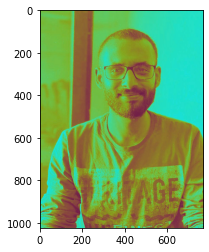

In [68]:
import numpy as np
import cv2
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
import skimage.io
import matplotlib.pyplot as plt

image = cv2.imread('sltyf.jpg')
(h1, w1) = image.shape[:2]
image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
image = image.reshape((image.shape[0] * image.shape[1], 3))
    
clt = KMeans(n_clusters = 20)

labels = clt.fit_predict(image)
quant = clt.cluster_centers_.astype("uint8")[labels]
    
#reshape the feature vectors to images
quant = quant.reshape((h1, w1, 3))
image = image.reshape((h1, w1, 3))
# convert from L*a*b* to RGB
quant = cv2.cvtColor(quant, cv2.COLOR_LAB2BGR)
image = cv2.cvtColor(image, cv2.COLOR_LAB2BGR)
    
cv2.imwrite('sltyfff.jpg', quant)   
plt.imshow(image)
cv2.imread('sltyf.jpg')
cv2.waitKey(0)
cv2.destroyAllWindows()

###### Remarque : 
> Après une filtrage de bruit, on remarque que la photo filtrée est plus proche à la photo originale que la photo bruitée. 
Mais cette différence n'est remarquable qu'aprés affecter un  grand nombre de clusters.

In [69]:
import session_info
session_info.show()